# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Rami Gorovoi-Abu Hashish\
**Email:** ra3564@nyu.edu

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Observed 9 sixes out of 10 rolls
P(A | 9 sixes) = 0.000
P(B | 9 sixes) = 0.003
P(C | 9 sixes) = 0.997
True die: C


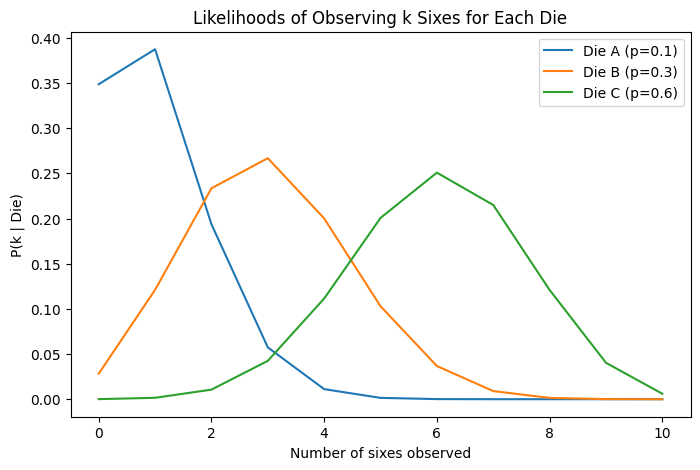

Accuracy over 100 rounds: 0.78


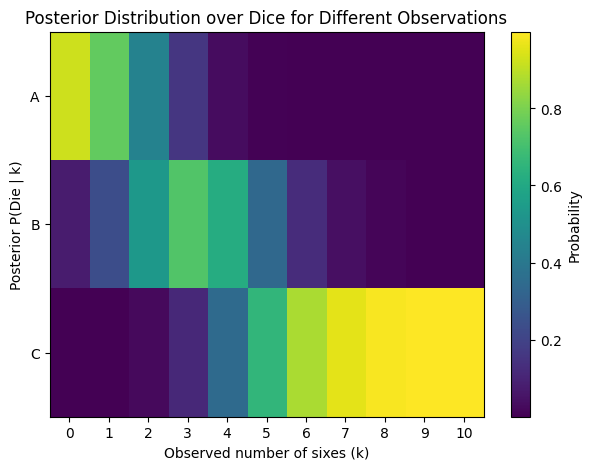

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.array([1/3, 1/3, 1/3])
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
  # Calculate binomial likelihood
  coef = math.comb(n, k)
  prob = coef * (p ** k) * ((1 - p) ** (n - k))
  return prob
  pass

def simulate_round():
  # Randomly select die based on prior
  die_idx = np.random.choice(len(dice_names))
  true_die = dice_names[die_idx]
  # Probability for a six with the randomly selected die
  p_six = dice_probs[true_die]
  # Simulate rolls and count sixes
  k = np.random.binomial(n_rolls, p_six)
  return true_die, k
  pass

def posterior_given_k(k):
  # Calculate posterior using Bayes theorem
  likelihoods = []
  # Calculate likelihood P(k|Die) for each die
  for die in dice_names:
      p = dice_probs[die]
      lik = binomial_prob(n_rolls, k, p)
      likelihoods.append(lik)

  likelihoods = np.array(likelihoods)
  # Unnormalized posterior = Likelihood * Prior
  unnormalized = likelihoods * prior
  # Evidence P(k) = Sum of (Likelihood * Prior)
  evidence = np.sum(unnormalized)
  return unnormalized / evidence
  pass

# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [7]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]
theta = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ theta
mse_linear = np.mean((y - y_pred)**2)
print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [ 5.00000000e+00 -5.55111512e-17] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

Alpha = 1/400:
Step 0: w = 13.0000, Cost = 80.0000
Step 1: w = 12.6000, Cost = 32.7680
Step 2: w = 12.3952, Cost = 18.9459
Step 3: w = 12.2594, Cost = 12.5786
Step 4: w = 12.1595, Cost = 9.0385

Alpha = 1/4,000,000:
Step 0: w = 13.0000, Cost = 80.0000
Step 1: w = 13.0000, Cost = 79.9936
Step 2: w = 12.9999, Cost = 79.9872
Step 3: w = 12.9999, Cost = 79.9808
Step 4: w = 12.9998, Cost = 79.9744


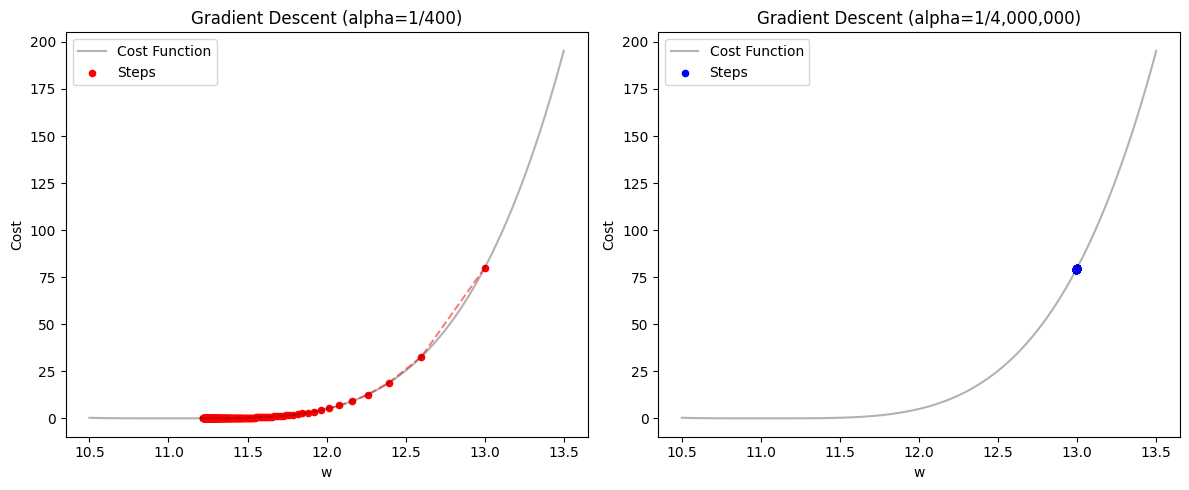

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    w = w0
    history = []
    # Store initial state
    history.append([w, 5 * (w - 11)**4])

    for _ in range(steps):
        grad = 20 * (w - 11)**3 # Calculating gradient: f'(w) = 20 * (w - 11)^3
        w = w - alpha * grad # Updating weight
        history.append([w, 5 * (w - 11)**4]) # Storing new w and cost

    return np.array(history)
    pass

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

# Print and Plot (TODO)
# Print first 5 steps for alpha = 1/400 and alpha = 1/4,000,000
print("Alpha = 1/400:")
for i in range(5):
    print(f"Step {i}: w = {hist_140[i, 0]:.4f}, Cost = {hist_140[i, 1]:.4f}")

print("\nAlpha = 1/4,000,000:")
for i in range(5):
    print(f"Step {i}: w = {hist_180[i, 0]:.4f}, Cost = {hist_180[i, 1]:.4f}")

# Visualize
w_grid = np.linspace(10.5, 13.5, 100)
cost_grid = 5 * (w_grid - 11)**4

plt.figure(figsize=(12, 5))

# Plot for alpha = 1/400
plt.subplot(1, 2, 1)
plt.plot(w_grid, cost_grid, 'k-', alpha=0.3, label='Cost Function')
plt.scatter(hist_140[:, 0], hist_140[:, 1], c='r', s=20, label='Steps')
plt.plot(hist_140[:, 0], hist_140[:, 1], 'r--', alpha=0.5)
plt.title('Gradient Descent (alpha=1/400)')
plt.xlabel('w')
plt.ylabel('Cost')
plt.legend()

# Plot for alpha = 1/4,000,000
plt.subplot(1, 2, 2)
plt.plot(w_grid, cost_grid, 'k-', alpha=0.3, label='Cost Function')
plt.scatter(hist_180[:, 0], hist_180[:, 1], c='b', s=20, label='Steps')
plt.plot(hist_180[:, 0], hist_180[:, 1], 'b--', alpha=0.5)
plt.title('Gradient Descent (alpha=1/4,000,000)')
plt.xlabel('w')
plt.ylabel('Cost')
plt.legend()

plt.tight_layout()
plt.show()

ALL THE BEST!